# K-mean

In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# M1 Science et Ingénieurie des données
# Université de Rouen Normandie
# T. Paquet
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy.linalg import norm
import sklearn
colors =['r','b','g','c','m','o']
n_colors = 6


def my_kmeans(X,K,Visualisation=False,Seuil=0.001,Max_iterations = 100000):
    
    N,p = np.shape(X)
    iteration = 0        
    Dist=np.zeros((K,N))
    J=np.zeros(Max_iterations+1)
    J[0] = 10000000
    
    # Initialisation des clusters
    # par tirage de K exemples, pour tomber dans les données     
 
    Index_init = np.random.choice(N, K,replace = False)
    C = np.zeros((p,K))
    for k in range(K):
        C[:,k] = X[Index_init[k],:].T 
        
        
    while iteration < Max_iterations:
        iteration +=1
        #################################################################
        # E step : estimation des données manquantes 
        #          affectation des données aux clusters les plus proches
        for k in range(K):
            Dist[k,:]=np.linalg.norm(X-C[:,k],axis=1)**2
        y=np.argmin(Dist,axis=0)
        #################################################################
        # M Step : calcul des meilleurs centres          
        for k in range(K):
              C[:,k]=np.mean(X[y==k,:],axis=0)
        #################################################################
        # test du critère d'arrêt l'évolution du critère est inférieure 
        # au Seuil en pour ceent
        J[iteration]=np.sum(np.min(Dist[y,:],axis=0))/N

        if np.abs(J[iteration]-J[iteration-1])/J[iteration-1]<Seuil:
             break;
    return C, y,J[1:iteration]

# K-mean++

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# M1 Science et Ingénieurie des données
# Université de Rouen Normandie
# T. Paquet
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy.linalg import norm

###########################################################################
# initialisation ++ du kmeans
#
def initPlusPlus(X,K):
    N,p = np.shape(X)
    C = np.zeros((p,K))
    generator = np.random.default_rng()
    index = np.random.choice(N, 1,replace = False)
    liste_index = [index]
    C[:,0] = X[index,:]
    X = np.delete(X,index,0)
    # print("k=0 C[k]=",C[:,0],"index=",index)
    k=1
    
    while k < K:
        
        # calcul des distances
        NN = X.shape[0]
        dist = np.zeros(NN)
        for n in range(NN):
            D=C[:,:k]-np.repeat(X[n,:],k).reshape(p,k)
            D=np.diag(D@D.T)
            dist[n]=np.min(D)
       # ICI ..... 
        # calcul des probabilités
        proba=dist/np.sum(dist)
        range_value=generator.random((1))[0]
        intervals=np.cumsum(proba)
        index=0
        while index<NN:
            if intervals[index]>range_value:
                break;
            index+=1
        # ICI ....
        
        # tirage aléatoire selon proba
        C[:,k]=X[index,:]
        X=np.delete(X,index,0)
        k+=1
       # ICI ...........
    return C
#----------------K-mean++-------------------------------
def my_kmeans_plus_plus(X,K,Visualisation=False,Seuil=0.001,Max_iterations = 1000):
    
    N,p = np.shape(X)
    iteration = 0        
    Dist=np.zeros((K,N))
    J=np.zeros(Max_iterations+1)
    J[0] = 10000000
    C=initPlusPlus(X,K)
        
    while iteration < Max_iterations:
        iteration +=1
        #################################################################
        # E step : estimation des données manquantes 
        #          affectation des données aux clusters les plus proches
        for k in range(K):
            Dist[k,:]=np.linalg.norm(X-C[:,k],axis=1)**2
        y=np.argmin(Dist,axis=0)
        #################################################################
        # M Step : calcul des meilleurs centres          
        for k in range(K):
              C[:,k]=np.mean(X[y==k,:],axis=0)
        #################################################################
        # test du critère d'arrêt l'évolution du critère est inférieure 
        # au Seuil en pour ceent
        J[iteration]=np.sum(np.min(Dist[y,:],axis=0))/N

        if np.abs(J[iteration]-J[iteration-1])/J[iteration-1]<Seuil:
             break;
    return C, y,J[1:iteration]

# K-medoide

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# M1 Science et Ingénieurie des données
# Université de Rouen Normandie
# T. Paquet
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy.linalg import norm

colors =['r','b','g','c','m','o']
n_colors = 6


def my_kmean_medoide(X,K,Visualisation=False,Seuil=0.0001,Max_iterations = 1000):
    
    N,p = np.shape(X)
    iteration = 0        
    Dist=np.zeros((K,N))
    J=np.zeros(Max_iterations+1)
    J[0] = 10000000
    
    # Initialisation des clusters
    # par tirage de K exemples, pour tomber dans les données     
 
    C=initPlusPlus(X,K)
        
    while iteration < Max_iterations:
        iteration +=1
        #################################################################
        # E step : estimation des données manquantes 
        #          affectation des données aux clusters les plus proches
        for k in range(K):
            Dist[k,:]=np.linalg.norm(X-C[:,k],axis=1)**2
        y=np.argmin(Dist,axis=0)
        #################################################################
        # M Step : calcul des meilleurs centres          
        for k in range(K):
              c_k=X[y==k]
              dist=np.array([sum([np.linalg.norm(c_k[j]-c_k[i])**2 for i in range(len(c_k))]) for j in range(len(c_k))])
              C[:,k]=c_k[np.argmin(dist)]
        #################################################################
        # test du critère d'arrêt l'évolution du critère est inférieure 
        # au Seuil en pour ceent
        J[iteration]=np.sum(np.min(Dist[y,:],axis=0))/N

        if np.abs(J[iteration]-J[iteration-1])/J[iteration-1]<Seuil:
             break;
    return C, y,J[1:iteration]

# Visualisation

In [59]:
def visalisationn(X,methode,K):
    colors =['r','b','g','c','m','o']
    n_colors = 6
    # we only take the first two features.
    # y = iris.target
    # fig = plt.figure(2, figsize=(8, 6))
    # plt.clf()
    # plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
    # plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
    # plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])
    
    # plt.xlabel('Sepal length')
    # plt.ylabel('Sepal width')
    # plt.legend(scatterpoints=1)


    Cluster, y, Critere = methode(X,K,Visualisation = False)
    
    # Cluster, y, Critere = my_kmeans(iris.data,K,Visualisation = False)
    
    fig = plt.figure(3, figsize=(18, 5))
    plt.subplot(1,3,1)
    for k in range(K):
        plt.plot(X[y==k, 0], X[y==k, 1], colors[k%n_colors]+'o')
    plt.plot(Cluster[0, :], Cluster[1,:],'kx')
    plt.title('K moyennes ('+str(K)+')')

    plt.subplot(1,3,2)
    plt.plot(Critere, 'o-')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Evolution du critère')
    plt.subplot(1,3,3)
    q=np.array([qualite_regroupement(X,my_kmeans,k) for k in range(1,10)])
    plt.xlabel('Nombre de groupe')
    plt.ylabel('Pourcentage de variance totale expliquée ')
    plt.title('Qualité de regroupement de k-mean-plus-plus')
    plt.plot([i[1] for i in q],[i[0] for i in q])
    plt.suptitle("K-moyennes sur le dataset IRIS k=3")
    plt.savefig('qualite')
    plt.show()

# Qualite de regroupement

In [15]:
def qualite_regroupement(X,methode,k):
    Cluster, y, Critere = methode(X,k,Visualisation = False)
    Ik=np.array([np.sum((X[y==k]-Cluster[:,k])**2)/len(X[y==k]) for k in range(len(Cluster[0]))])
    Iw=np.sum([(len(X[y==k])*Ik[k])/len(X) for k in range(k)])
    Ib=np.sum([(len(X[y==k])/len(X))*(X.mean(axis=0)-Cluster[:,k])**2 for k in range(k)])
    It=Iw+Ib
    C=100*(1-(Iw/It))
    return C,k

In [51]:
iris = datasets.load_iris()
X=iris.data
Y=datasets.load_breast_cancer(return_X_y=False, as_frame=False)['data'][:,:2]

In [60]:
qualite_regroupement(X,my_kmeans,3)

(88.42752513446486, 3)

In [53]:
qualite_regroupement(X,my_kmeans_plus_plus,3)

(88.42752513446486, 3)

In [113]:
qualite_regroupement(X,my_kmean_medoide,9)

(94.00847946114659, 9)

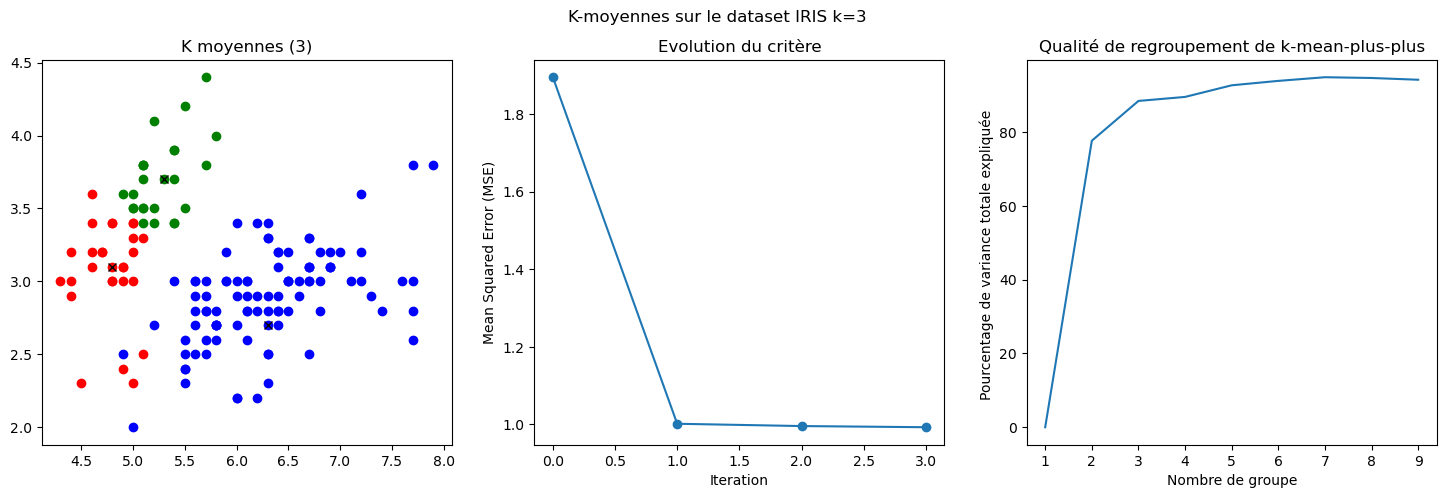

In [157]:
visalisationn(X,my_kmean_medoide,3)

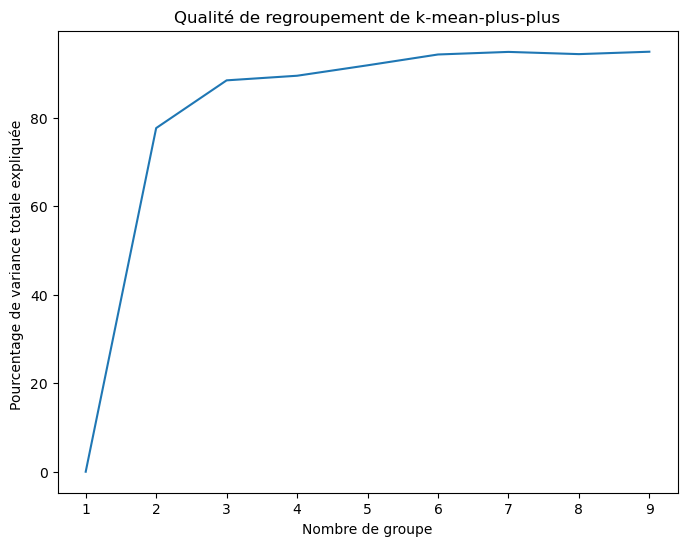

In [98]:
q=np.array([qualite_regroupement(X,my_kmeans,k) for k in range(1,10)])
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Nombre de groupe')
plt.ylabel('Pourcentage de variance totale expliquée ')
plt.title('Qualité de regroupement de k-mean-plus-plus')
plt.plot([i[1] for i in q],[i[0] for i in q])
plt.savefig('qualite')
plt.show()

In [1]:
from sklearn.cluster import KMeans
# calcul des k-means

# les centroïdes résultas



In [107]:
qualite_regroupement(X,my_kmeans,3)

(88.4269051488313, 3)

In [9]:
conda install -c conda-forge scikit-learn-extra

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Souniz\anaconda3

  added / updated specs:
    - scikit-learn-extra


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       h56e8100_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.1.2               |  py311h1ea47a8_0         1.2 MB  conda-forge
    openssl-3.3.2              |       h2466b09_0         8.0 MB  conda-forge
    python_abi-3.11            |          2_cp311           5 KB  conda-forge
    scikit-learn-extra-0.3.0   |  py311hbc92ba2_0         275 KB  conda-forge
    setuptools-75.1.0          |     pyhd8ed1ab_0         759 KB  conda-forge
    ucrt-10.0.22621.0          |       h57928b3_0    

In [7]:
pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [59 lines of output]
  C:\Users\Souniz\AppData\Local\Temp\pip-build-env-v5kiweqo\overlay\Lib\site-packages\setuptools\dist.py:294: InformationOnly: Normalizing '0.3.0dev0' to '0.3.0.dev0'
    self.metadata.version = self._normalize_version(self.metadata.version)
  C:\Users\Souniz\AppData\Local\Temp\pip-build-env-v5kiweqo\overlay\Lib\site-packages\setuptools\dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    opt = self.warn_dash_deprecation(opt, 

In [5]:
pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [59 lines of output]
  C:\Users\Souniz\AppData\Local\Temp\pip-build-env-1eou9ypp\overlay\Lib\site-packages\setuptools\dist.py:294: InformationOnly: Normalizing '0.3.0dev0' to '0.3.0.dev0'
    self.metadata.version = self._normalize_version(self.metadata.version)
  C:\Users\Souniz\AppData\Local\Temp\pip-build-env-1eou9ypp\overlay\Lib\site-packages\setuptools\dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    opt = self.warn_dash_deprecation(opt, 

In [4]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 262.6 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.8 MB 393.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.8 MB 403.5 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.8 MB 467.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 450.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.8 MB 425.3 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 436.9 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 436.9 kB/s eta 0:00:04
   ----- ----------------------

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [59 lines of output]
  C:\Users\Souniz\AppData\Local\Temp\pip-build-env-vl6ure7z\overlay\Lib\site-packages\setuptools\dist.py:294: InformationOnly: Normalizing '0.3.0dev0' to '0.3.0.dev0'
    self.metadata.version = self._normalize_version(self.metadata.version)
  C:\Users\Souniz\AppData\Local\Temp\pip-build-env-vl6ure7z\overlay\Lib\site-packages\setuptools\dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    opt = self.warn_dash_deprecation(opt, 

  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn-extra


In [16]:
iris = datasets.load_iris()
X=iris.data
Y=datasets.load_breast_cancer(return_X_y=False, as_frame=False)['data'][:,:2]

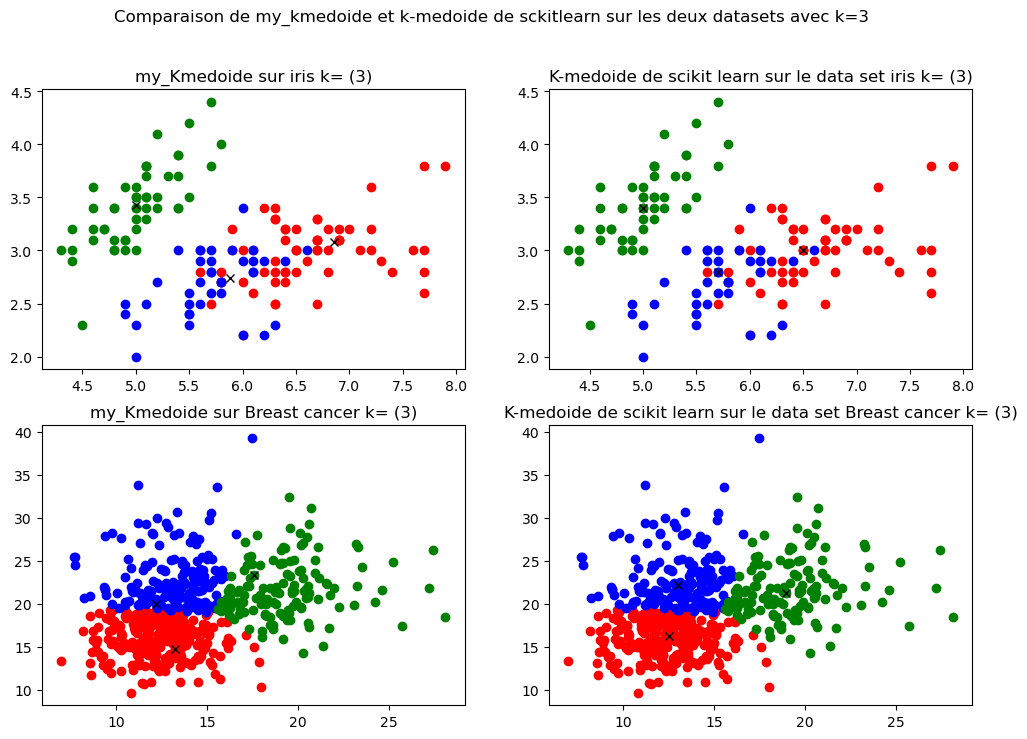

In [19]:
from sklearn_extra.cluster import KMedoids 
colors =['r','b','g','c','m','o']
n_colors = 6
K=3
# we only take the first two features.
# y = iris.target
# fig = plt.figure(2, figsize=(8, 6))
# plt.clf()
# plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
# plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
# plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])

# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.legend(scatterpoints=1)


Cluster1, y1, Critere = my_kmeans_plus_plus(X,3,Visualisation = False)
kmeans = KMedoids(n_clusters=3, random_state=0).fit(X)
y1=kmeans.labels_
c1=kmeans.cluster_centers_.T
Cluster2, y2, Critere = my_kmean_medoide(Y,3,Visualisation = False)
kmeans = KMedoids(n_clusters=3, random_state=0).fit(Y)
y2=kmeans.labels_
c2=kmeans.cluster_centers_.T
# Cluster, y, Critere = my_kmeans(iris.data,K,Visualisation = False)

fig = plt.figure(3, figsize=(12, 8))
plt.subplot(2,2,1)
for k in range(K):
    plt.plot(X[y1==k, 0], X[y1==k, 1], colors[k%n_colors]+'o')
plt.plot(Cluster1[0, :], Cluster1[1, :],'kx')
plt.title('my_Kmedoide sur iris k= ('+str(K)+')')

plt.subplot(2,2,2)
for k in range(K):
    plt.plot(X[y1==k, 0], X[y1==k, 1], colors[k%n_colors]+'o')
plt.plot(c1[0, :], c1[1, :],'kx')
plt.title('K-medoide de scikit learn sur le data set iris k= ('+str(K)+')')
plt.subplot(2,2,3)
for k in range(K):
    plt.plot(Y[y2==k, 0], Y[y2==k, 1], colors[k%n_colors]+'o')
plt.plot(Cluster2[0, :], Cluster2[1, :],'kx')
plt.title('my_Kmedoide sur Breast cancer k= ('+str(K)+')')

plt.subplot(2,2,4)
for k in range(K):
    plt.plot(Y[y2==k, 0], Y[y2==k, 1], colors[k%n_colors]+'o')
plt.plot(c2[0, :], c2[1, :],'kx')
plt.title('K-medoide de scikit learn sur le data set Breast cancer k= ('+str(K)+')')
plt.suptitle("Comparaison de my_kmedoide et k-medoide de sckitlearn sur les deux datasets avec k=3")
plt.savefig('qualite')
plt.show()

In [49]:
Cluster

array([[6.85      , 5.006     , 5.9016129 ],
       [3.07368421, 3.428     , 2.7483871 ],
       [5.74210526, 1.462     , 4.39354839],
       [2.07105263, 0.246     , 1.43387097]])

In [65]:
c1

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

C:\Users\Souniz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Initialization complete
Iteration 0, inertia 389.77000000000004.
Iteration 1, inertia 97.03927000646627.
Iteration 2, inertia 80.15578581468587.
Iteration 3, inertia 78.85144142614601.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 140.39.
Iteration 1, inertia 79.35648012363987.
Iteration 2, inertia 78.85144142614601.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 172.43.
Iteration 1, inertia 145.6835461017663.
Iteration 2, inertia 144.6052731821509.
Iteration 3, inertia 144.17125349400817.
Iteration 4, inertia 143.74764944714195.
Iteration 5, inertia 143.5629017791473.
Iteration 6, inertia 143.51378065600673.
Iteration 7, inertia 143.31035175730676.
Iteration 8, inertia 142.9128981252264.
Iteration 9, inertia 142.8049513888889.
Iteration 10, inertia 142.77336161700458.
Iteration 11, inertia 142.7540625.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 722.

Text(0.5, 1.0, 'my_Kmean sur iris k= (3)')

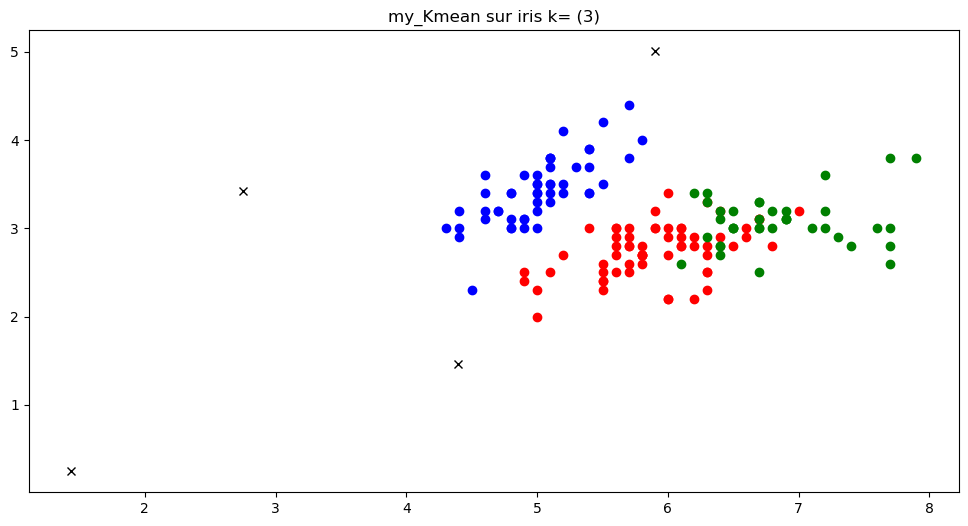

In [55]:
kmeans = KMeans(n_clusters=3,init='random',n_init = 10, verbose=1, max_iter=100).fit(X)
y1=kmeans.labels_
Cluster1=kmeans.cluster_centers_
# Cluster, y, Critere = my_kmeans(iris.data,K,Visualisation = False)

fig = plt.figure(3, figsize=(12, 6))
for k in range(K):
    plt.plot(X[y1==k, 0], X[y1==k, 1], colors[k%n_colors]+'o')
plt.plot(Cluster1[0, :], Cluster1[1, :],'kx')
plt.title('my_Kmean sur iris k= ('+str(K)+')')

In [56]:
Cluster1

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])